<a href="https://colab.research.google.com/github/zedeme/E-Sports-Teams/blob/main/g-E_Sports_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-Sport Team Analisis**

---

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import MeanShift, KMeans

In [ ]:
df = pd.read_csv("/content/sample_data/highest_earning_teams.csv")

### **Entendiendo el dataframe**

Vamos a analizar, graficar y limpiar el dataframe para posteriormente responder preguntas e intentar llegar a conclusiones que ayuden para la creacion del modelo. 

In [ ]:
df

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [ ]:
df.dtypes

TeamId                int64
TeamName             object
TotalUSDPrize       float64
TotalTournaments      int64
Game                 object
Genre                object
dtype: object

In [ ]:
df.describe()

,TeamId,TotalUSDPrize,TotalTournaments
count,928.000000,9.280000e+02,928.000000
mean,3836.927802,5.399183e+05,31.696121
std,8438.383941,1.902399e+06,61.075848
min,101.000000,1.750000e+02,1.000000
25%,227.000000,3.915000e+04,4.000000
50%,529.000000,1.165306e+05,11.000000
75%,789.000000,3.231491e+05,33.000000
max,24997.000000,3.381064e+07,808.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


###### ***Pregunta 1: ¿Cuales son los equipos mejores pagados?***

In [ ]:
df_t = df.sort_values(by="TotalUSDPrize", ascending=False)

In [ ]:
sns.set(rc={"figure.figsize": (15,9)})

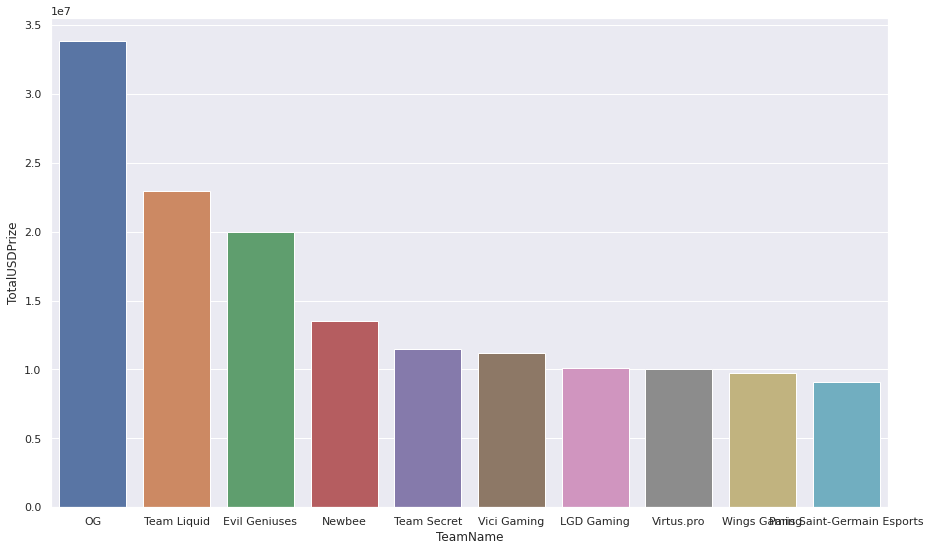

In [ ]:
sns.barplot(data=df_t.head(10), x="TeamName", y="TotalUSDPrize")

***Respuesta: OG es el equipo mejor pagado***

---

###### ***Pregunta 2: ¿Que juego genera mas ganancia?***

In [ ]:
def game_code(x):
  if x == "Counter-Strike: Global Offensive":
    return "CSGO" 
  if x == "League of Legends":
    return "LOL"
  if x == "Heroes of the Storm":
    return "HOS"
  return x

In [ ]:
df["Game"] = df["Game"].apply(lambda x: game_code(x))
df_g = pd.pivot_table(data=df, index=["Game"]).reset_index()

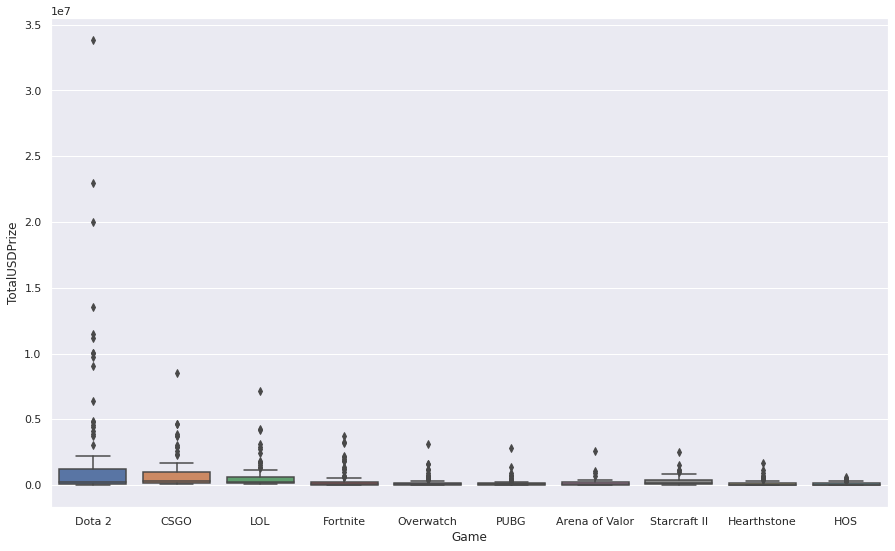

In [ ]:
sns.boxplot(data=df_t, x="Game", y="TotalUSDPrize")

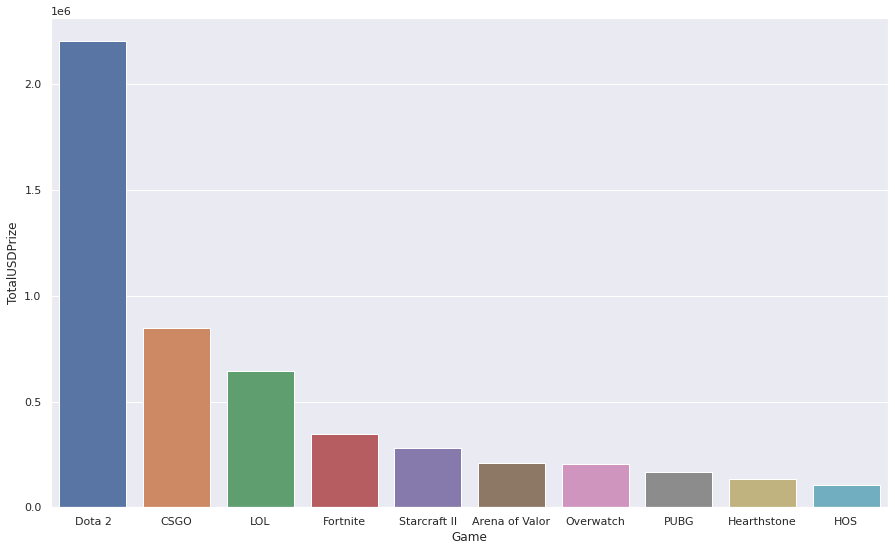

In [ ]:
sns.barplot(data=df_g.sort_values(by="TotalUSDPrize", ascending=False), x="Game", y="TotalUSDPrize")

In [ ]:
df_g

,Game,TeamId,TotalTournaments,TotalUSDPrize
0,Arena of Valor,5101.833333,2.958333,2.076906e+05
1,CSGO,3357.840000,59.960000,8.485393e+05
2,Dota 2,3833.040000,29.310000,2.202828e+06
3,Fortnite,9266.500000,12.290000,3.466133e+05
4,HOS,2178.530000,16.630000,1.071052e+05
5,Hearthstone,730.087500,8.275000,1.358066e+05
6,LOL,1844.370000,25.150000,6.466556e+05
7,Overwatch,2511.170000,7.720000,2.046527e+05
8,PUBG,8274.220000,8.280000,1.671500e+05
9,Starcraft II,1308.070000,126.760000,2.785615e+05


***Respuesta: El juego mejor pagado es el Dota2 no solo contando la naturaleza de sus datos sino tambien sus outliers***

---

###### ***Pregunta 3: ¿El numero de torneos afecta al precio ganado por equipo? ¿Cuanto gana cada equipo por torneo?***

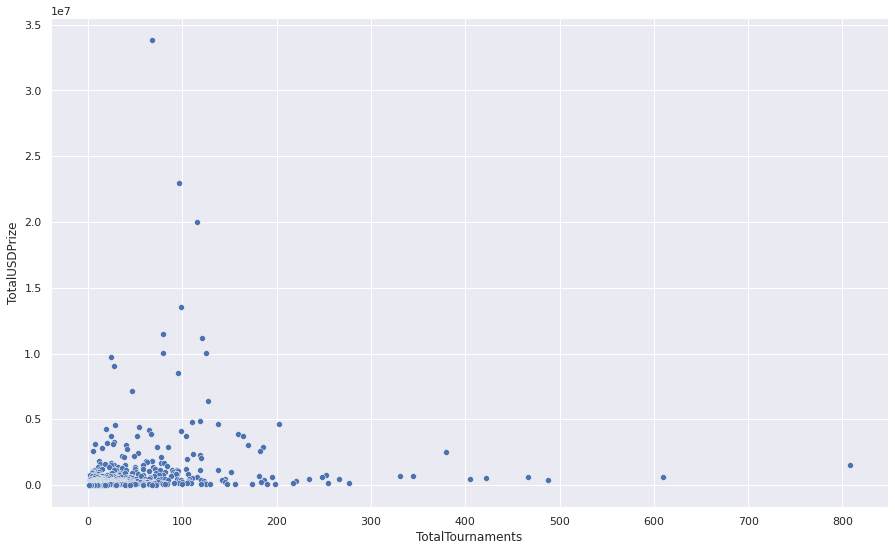

In [ ]:
sns.scatterplot(data=df_t, x="TotalTournaments", y="TotalUSDPrize")

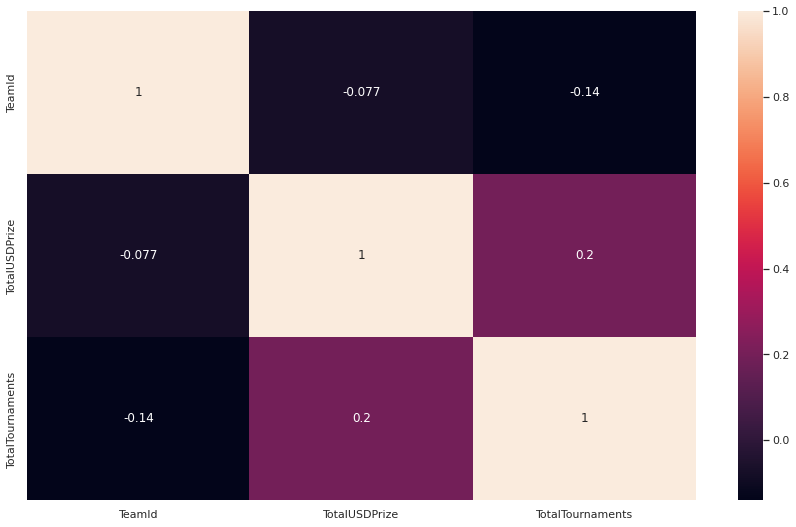

In [ ]:
sns.heatmap(df_t.corr(), annot=True)

In [ ]:
df_t["PricePerTournaments"] = df_t["TotalUSDPrize"]
df_t["PricePerTournaments"] = df_t["PricePerTournaments"].apply(lambda x: round(x / df["TotalTournaments"], 2))

In [ ]:
df_t = df_t.sort_values(by="PricePerTournaments", ascending=False)

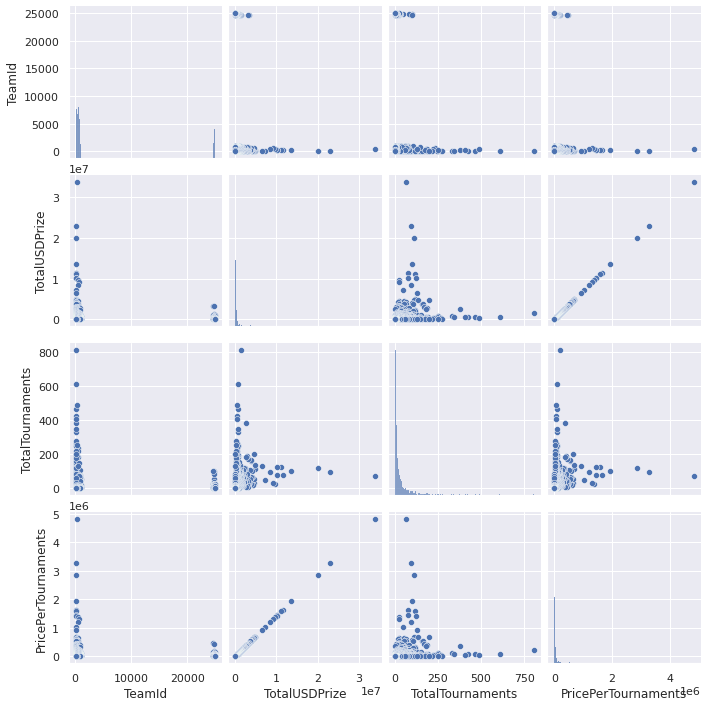

In [ ]:
sns.pairplot(df_t)

In [ ]:
df_t

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,PricePerTournaments
500,419,OG,33810636.13,68,Dota 2,Multiplayer Online Battle Arena,4830090.88
501,102,Team Liquid,22967431.10,96,Dota 2,Multiplayer Online Battle Arena,3281061.59
502,101,Evil Geniuses,19988670.62,115,Dota 2,Multiplayer Online Battle Arena,2855524.37
503,210,Newbee,13523736.43,98,Dota 2,Multiplayer Online Battle Arena,1931962.35
504,211,Team Secret,11492345.09,79,Dota 2,Multiplayer Online Battle Arena,1641763.58
...,...,...,...,...,...,...,...
875,233,TCM Gaming,500.00,1,Hearthstone,Collectible Card Game,71.43
876,111,mousesports,416.84,3,Hearthstone,Collectible Card Game,59.55
877,342,Star Horn Royal Club,306.00,1,Hearthstone,Collectible Card Game,43.71
878,203,3DMAX,300.00,3,Hearthstone,Collectible Card Game,42.86


***Respuesta 3: El numero de torneos no parece afectar de manera significativa la lista de los equipos mejores pagados***

---

### **Clustering**
Para encontrar patrones dentro de los datos.

In [ ]:
df

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [ ]:
X = df.drop(columns=["TeamName", "TeamId"])
X = pd.get_dummies(X)

In [ ]:
X

,TotalUSDPrize,TotalTournaments,Game_Arena of Valor,Game_CSGO,Game_Dota 2,Game_Fortnite,Game_HOS,Game_Hearthstone,Game_LOL,Game_Overwatch,Game_PUBG,Game_Starcraft II,Genre_Battle Royale,Genre_Collectible Card Game,Genre_First-Person Shooter,Genre_Multiplayer Online Battle Arena,Genre_Strategy
0,3105000.0,7,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1591136.5,13,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1572618.5,18,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1186278.5,15,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1130000.0,6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,6286.8,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
924,4000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
925,3429.6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
926,2500.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = StandardScaler().fit_transform(X)

#### ***MeanShift***

###### ***Con PCA***

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(X)


In [ ]:
X_p = pca.transform(X)

In [ ]:
X_p

array([[ 0.41906843, -0.94016828],
       [ 0.46676709, -1.04120881],
       [ 0.50124839, -1.02931859],
       ...,
       [-1.33235131,  1.46053424],
       [-1.33234738,  1.46046238],
       [-1.33234738,  1.46046238]])

In [ ]:
meanshift = MeanShift(max_iter=1000)
meanshift = meanshift.fit(X_p)

In [ ]:
X_p = pd.DataFrame(X_p)

In [ ]:
X_p

,0,1
0,0.419068,-0.940168
1,0.466767,-1.041209
2,0.501248,-1.029319
3,0.482244,-1.067177
4,0.420557,-1.095507
...,...,...
923,-1.325483,1.463419
924,-1.332354,1.460578
925,-1.332351,1.460534
926,-1.332347,1.460462


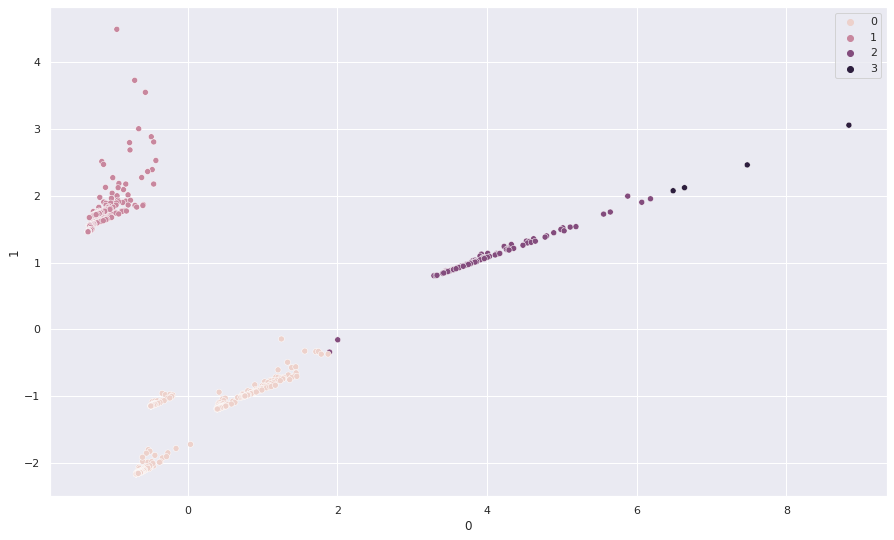

In [ ]:
sns.scatterplot(x=X_p[0], y=X_p[1], hue=meanshift.predict(X_p))

In [ ]:
df["group"] = meanshift.predict(X_p)

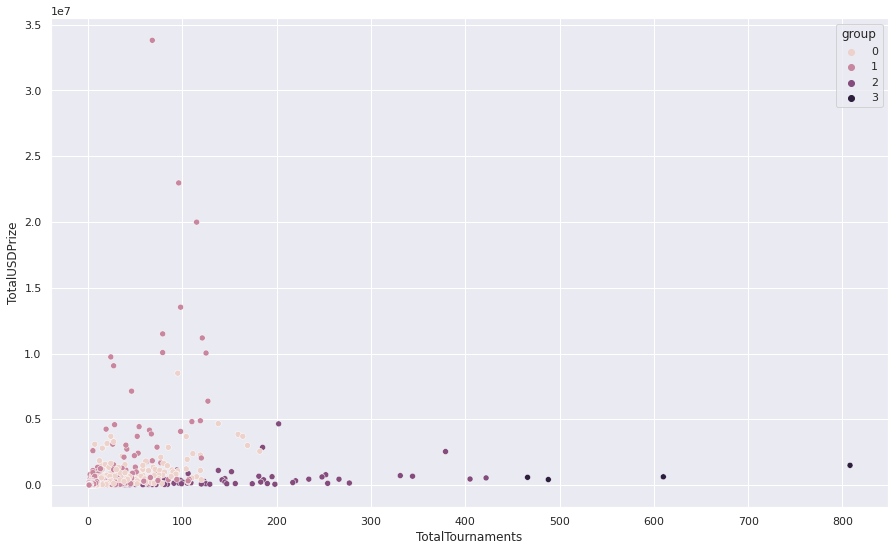

In [ ]:
sns.scatterplot(x=df["TotalTournaments"], y=df["TotalUSDPrize"], hue=df["group"])

In [ ]:
df

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,group
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter,0
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter,0
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter,0
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter,0
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter,0
...,...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena,1
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena,1
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena,1
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena,1


In [ ]:
max(meanshift.predict(X_p))

3

###### ***Con KPCA***

In [ ]:
kpca = KernelPCA(n_components = 2, kernel="poly")
kpca = kpca.fit(X)

In [ ]:
X_kp = kpca.transform(X)

In [ ]:
meanshift = MeanShift(max_iter=1000)
meanshift = meanshift.fit(X_kp)

In [ ]:
max(meanshift.predict(X_kp))

19

In [ ]:
X_kp = pd.DataFrame(X_kp)

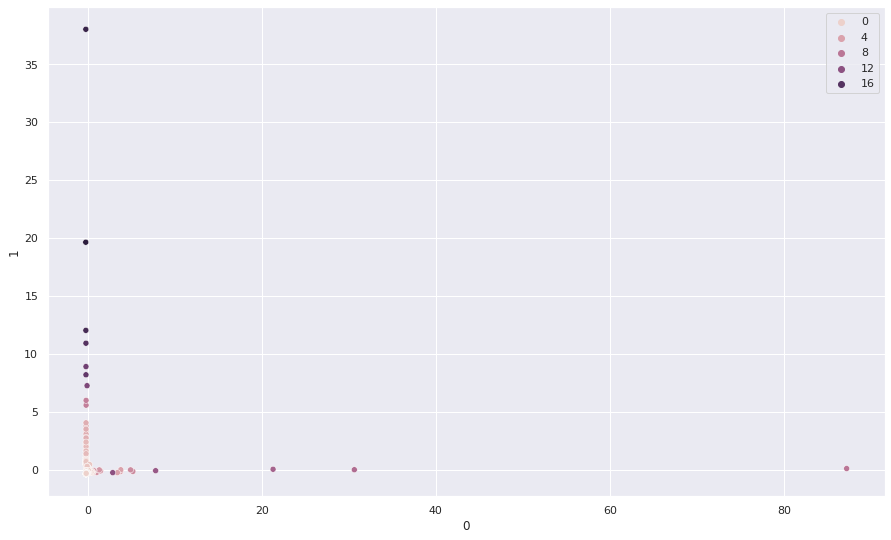

In [ ]:
sns.scatterplot(x=X_kp[0], y=X_kp[1], hue=meanshift.predict(X_kp))

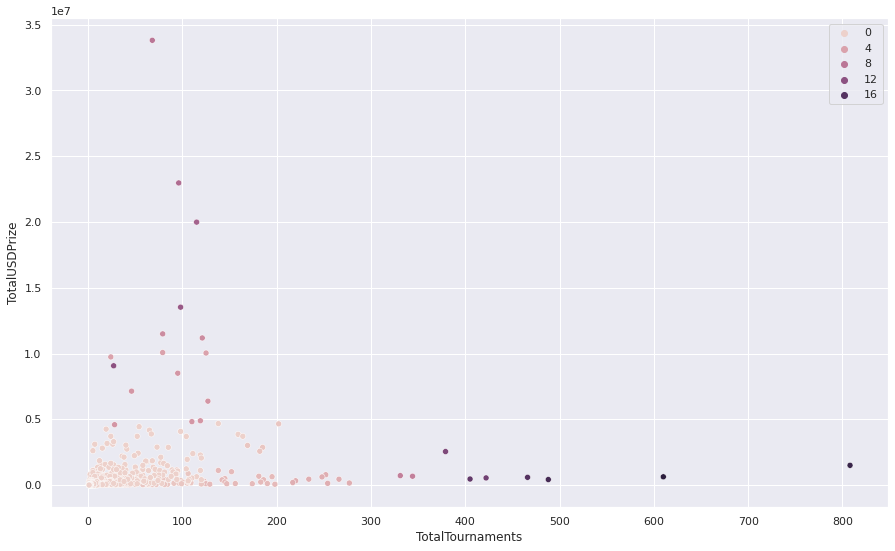

In [ ]:
sns.scatterplot(x=df["TotalTournaments"], y=df["TotalUSDPrize"], hue=meanshift.predict(X_kp))

In [ ]:
df["group"] = meanshift.predict(X_kp)

In [ ]:
df

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,group
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter,0
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter,0
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter,0
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter,0
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter,0
...,...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena,0
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena,0
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena,0
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena,0


In [ ]:
max(meanshift.predict(X_kp))

19

###### ***Sin PCA***

In [ ]:
X

array([[ 1.34906793, -0.4045697 , -0.23354968, ...,  1.9078784 ,
        -0.77459667, -0.34752402],
       [ 0.55287313, -0.30627822, -0.23354968, ...,  1.9078784 ,
        -0.77459667, -0.34752402],
       [ 0.54313385, -0.22436866, -0.23354968, ...,  1.9078784 ,
        -0.77459667, -0.34752402],
       ...,
       [-0.28215855, -0.50286118,  4.28174419, ..., -0.52414242,
         1.29099445, -0.34752402],
       [-0.28264746, -0.50286118,  4.28174419, ..., -0.52414242,
         1.29099445, -0.34752402],
       [-0.28264746, -0.50286118,  4.28174419, ..., -0.52414242,
         1.29099445, -0.34752402]])

In [ ]:
meanshift = MeanShift(max_iter=1000)
meanshift = meanshift.fit(X)

In [ ]:
X_w = meanshift.predict(X)

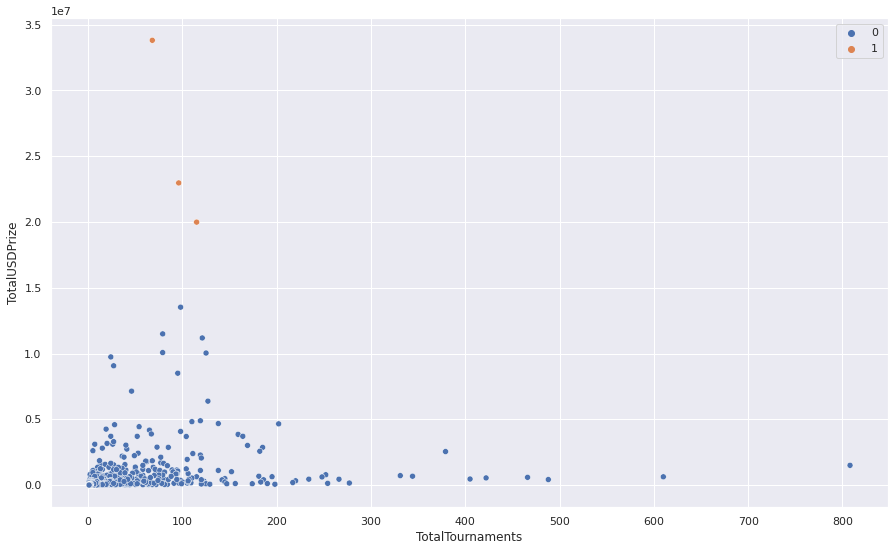

In [ ]:
sns.scatterplot(x=df["TotalTournaments"], y=df["TotalUSDPrize"], hue=meanshift.predict(X))

In [ ]:
max(meanshift.predict(X))

1

#### ***KMeans***

Usamos el metodo del codo para encontrar el mejor numero de clusters

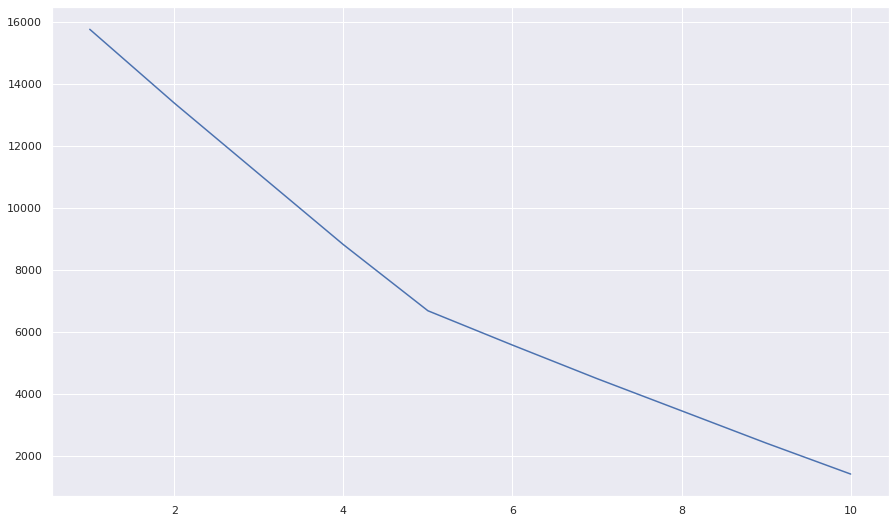

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, max_iter=1000)
  kmeans = kmeans.fit(X)
  wcss.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=wcss)

In [ ]:
wcss

[15776.0,
 13395.225931272355,
 11110.134174457118,
 8826.748166073718,
 6692.27049927042,
 5584.806390695419,
 4502.376220146788,
 3463.406810906865,
 2422.6683103681935,
 1422.3998135481263]

###### ***Con PCA***

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(X)

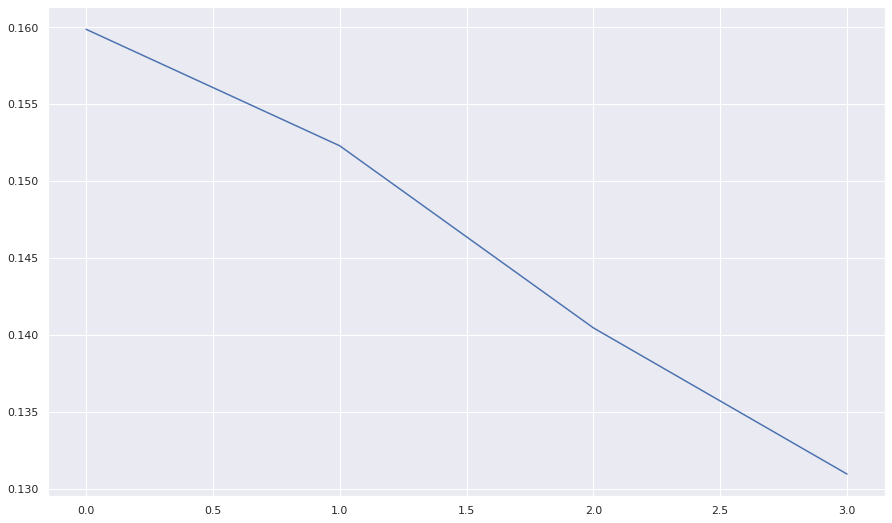

In [ ]:
sns.lineplot(x = range(pca.n_components_), y = pca.explained_variance_ratio_)

In [ ]:
X_p = pca.transform(X)

In [ ]:
X_p

array([[ 0.41906843, -0.94016828],
       [ 0.46676709, -1.04120881],
       [ 0.50124839, -1.02931859],
       ...,
       [-1.33235131,  1.46053424],
       [-1.33234738,  1.46046238],
       [-1.33234738,  1.46046238]])

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X_p)

In [ ]:
df["group"] = kmeans.predict(X_p)

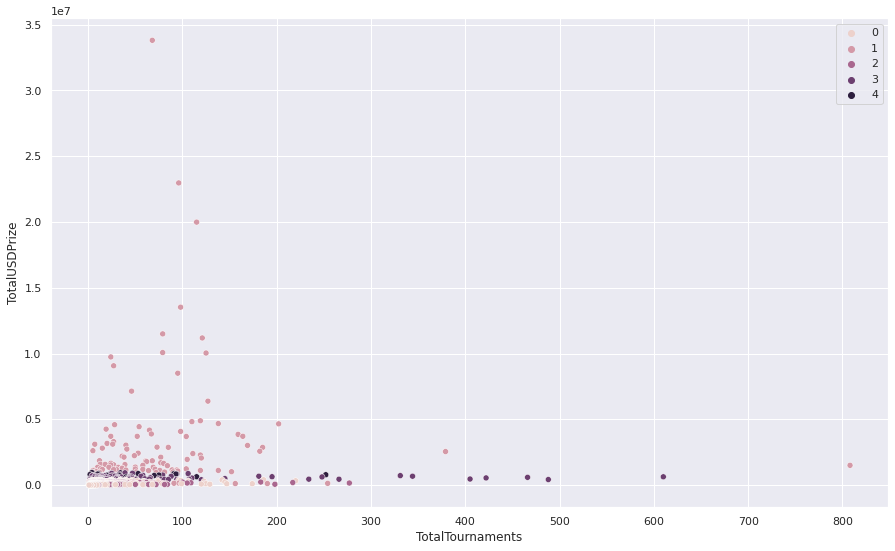

In [ ]:
sns.scatterplot(x=df_t["TotalTournaments"], y=df_t["TotalUSDPrize"], hue=kmeans.predict(X_p))

In [ ]:
X_p = pd.DataFrame(X_p)

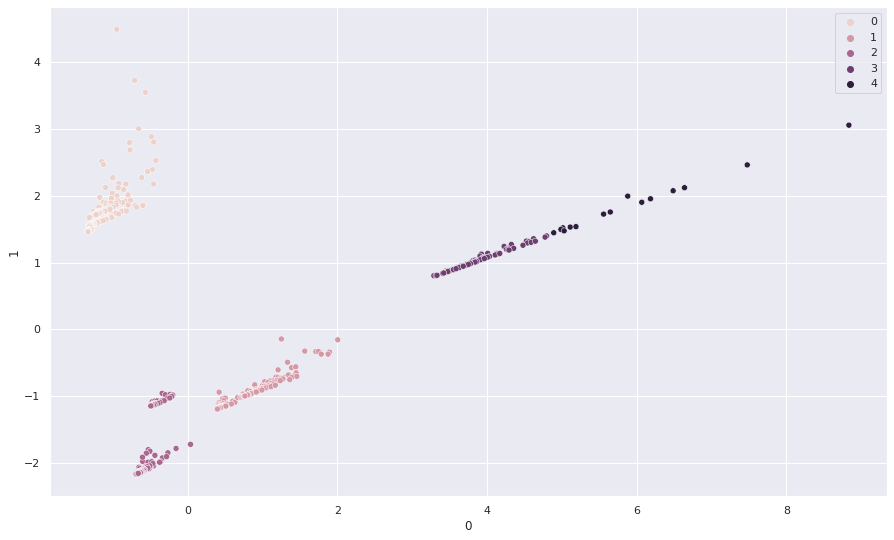

In [ ]:
sns.scatterplot(x = X_p[0], y = X_p[1], hue=kmeans.predict(X_p))